# Take Home Test | Data Science | Dibimbing DS DA 33B | Rizky Febri Ibra Habibie |

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_excel('final_customer_data.xlsx')
df.head()

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN


In [124]:
df = df.copy()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User_id      2090 non-null   int64  
 1   Session_id   2090 non-null   object 
 2   DateTime     2090 non-null   object 
 3   Category     2090 non-null   object 
 4   SubCategory  2090 non-null   object 
 5   Action       2090 non-null   object 
 6   Quantity     201 non-null    float64
 7   Rate         201 non-null    float64
 8   Total Price  201 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 147.1+ KB


In [126]:
check = df['Quantity'].notna()
df[check].head()

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
13,51629142904,b5bdd3-4ca2-4c55-939e,2019-09-03 18:10:00,Cleaning supplies,Cleaning sprays,purchase,5.0,300.0,1500.0
21,51629142904,fbdhyrt4ca2-4c55-939e,2019-01-10 21:08:00,Mobile & Accessories,Charging wire,purchase,2.0,2000.0,4000.0
42,51940324591,rtfghf9-2748-4c56-87565,2019-04-08 19:09:00,Mobile & Accessories,Cases,purchase,5.0,100.0,500.0
55,51965507652,d40a28-41f9-4325-bbae,2019-12-10 19:25:00,Digital Devices,Headphones,purchase,4.0,1000.0,4000.0
67,51940324591,yhfghfgh-77f8-40c9-8e5786,2019-12-10 13:07:00,Fitness,Dumbells,purchase,2.0,1000.0,2000.0


In [127]:
# Mengecek jumlah nilai unik di setiap kolom
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

User_id: 401 unique values
Session_id: 2064 unique values
DateTime: 1984 unique values
Category: 105 unique values
SubCategory: 364 unique values
Action: 13 unique values
Quantity: 10 unique values
Rate: 62 unique values
Total Price: 68 unique values


In [128]:
# Mengecek apakah ada nilai yang hilang (missing values)
len(df.drop_duplicates()) / len(df)

1.0

In [129]:
df["DateTime"] = pd.to_datetime(df["DateTime"], errors="coerce")

## Cek missing value

In [130]:
# Menggunakan isna
df.isna().sum()

User_id           0
Session_id        0
DateTime          0
Category          0
SubCategory       0
Action            0
Quantity       1889
Rate           1889
Total Price    1889
dtype: int64

In [131]:
value_cols = ["Quantity", "Rate", "Total Price"]
purchase_row = df[value_cols].notna().all(axis=1)
df["is_purchase_row"] = purchase_row.astype(int)

In [132]:
users_with_purchase = df.loc[df["is_purchase_row"] == 1, "User_id"].unique()
df["is_converter"] = df["User_id"].isin(users_with_purchase).astype(int)

In [133]:
transactions = df[df["is_purchase_row"] == 1].copy()
events       = df[df["is_purchase_row"] == 0].copy()

In [134]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 13 to 2088
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   User_id          201 non-null    int64         
 1   Session_id       201 non-null    object        
 2   DateTime         201 non-null    datetime64[ns]
 3   Category         201 non-null    object        
 4   SubCategory      201 non-null    object        
 5   Action           201 non-null    object        
 6   Quantity         201 non-null    float64       
 7   Rate             201 non-null    float64       
 8   Total Price      201 non-null    float64       
 9   is_purchase_row  201 non-null    int64         
 10  is_converter     201 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 18.8+ KB


In [135]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1889 entries, 0 to 2089
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   User_id          1889 non-null   int64         
 1   Session_id       1889 non-null   object        
 2   DateTime         1889 non-null   datetime64[ns]
 3   Category         1889 non-null   object        
 4   SubCategory      1889 non-null   object        
 5   Action           1889 non-null   object        
 6   Quantity         0 non-null      float64       
 7   Rate             0 non-null      float64       
 8   Total Price      0 non-null      float64       
 9   is_purchase_row  1889 non-null   int64         
 10  is_converter     1889 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 177.1+ KB


## Cek Outlier

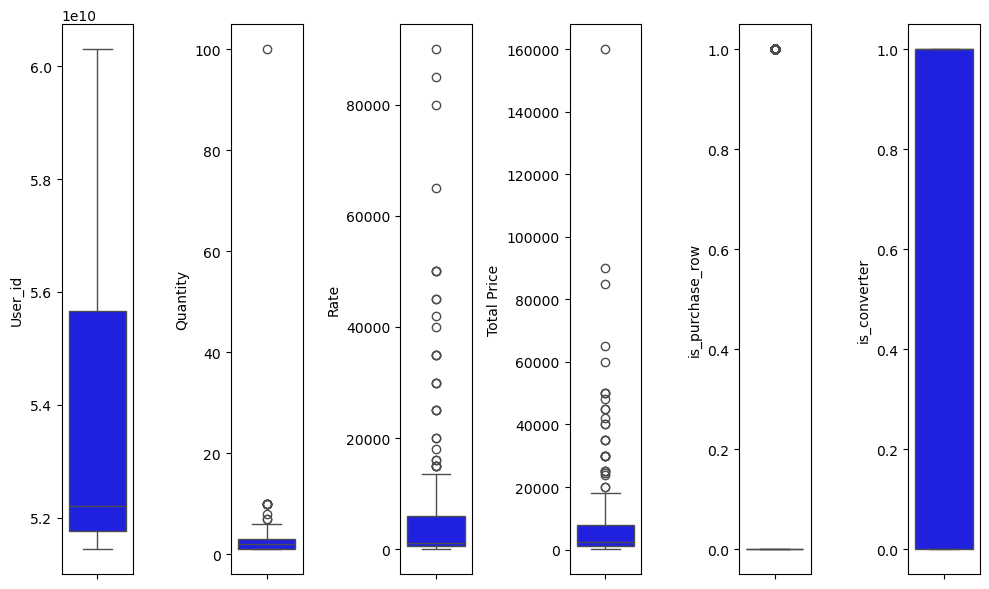

In [136]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 6))
for i in range(0, len(numerical_columns)):
    plt.subplot(1,len(numerical_columns), i+1)
    sns.boxplot(y=df[numerical_columns[i]], color='blue')
    plt.tight_layout()

nothing to do

In [137]:
# Aggregate on ALL rows (transactions + events)
agg_all = df.groupby("User_id").agg(
    first_seen=("DateTime", "min"),
    last_seen=("DateTime", "max"),
    total_events=("DateTime", "count"),
    is_converter=("is_converter", "max")
)
agg_all


,first_seen,last_seen,total_events,is_converter
User_id,,,,
51443820326,2019-05-11 13:37:00,2019-05-11 14:05:00,3,0
51448162784,2019-01-11 10:33:00,2019-12-12 19:22:00,13,1
51455512201,2019-09-10 10:00:00,2019-10-19 19:12:00,10,1
51462598385,2019-05-12 12:20:00,2019-12-20 21:15:00,16,1
51463622150,2019-10-13 19:18:00,2019-11-12 21:27:00,16,1
...,...,...,...,...
60195726556,2019-11-11 21:21:00,2019-11-11 21:40:00,4,0
60238282834,2019-07-21 13:00:00,2019-12-11 13:52:00,18,1
60282325526,2019-08-11 19:04:00,2019-08-11 19:28:00,3,0


In [138]:
# Aggregate ONLY on transactions
if not transactions.empty:
    agg_tx = transactions.groupby("User_id").agg(
        purchases=("DateTime", "count"),
        first_purchase=("DateTime", "min"),
        last_purchase=("DateTime", "max"),
        total_quantity=("Quantity", "sum"),
        total_revenue=("Total Price", "sum"),
        median_rate=("Rate", "median")
    )
else:
    agg_tx = pd.DataFrame(columns=[
        "purchases","first_purchase","last_purchase",
        "total_quantity","total_revenue","median_rate"
    ])
agg_tx

,purchases,first_purchase,last_purchase,total_quantity,total_revenue,median_rate
User_id,,,,,,
51448162784,2,2019-06-11 13:23:00,2019-12-12 19:22:00,3.0,21500.0,5750.0
51455512201,1,2019-10-19 19:12:00,2019-10-19 19:12:00,2.0,10000.0,5000.0
51462598385,2,2019-10-20 17:30:00,2019-12-15 19:03:00,2.0,550.0,275.0
51463622150,2,2019-10-14 21:44:00,2019-11-12 21:27:00,8.0,950.0,125.0
51465529647,2,2019-12-05 19:30:00,2019-12-12 21:15:00,5.0,15500.0,3250.0
...,...,...,...,...,...,...
60029406377,1,2019-07-11 23:03:00,2019-07-11 23:03:00,2.0,3000.0,1500.0
60034334067,1,2019-11-11 21:51:00,2019-11-11 21:51:00,1.0,35000.0,35000.0
60089394505,1,2019-11-11 20:32:00,2019-11-11 20:32:00,1.0,13000.0,13000.0


In [139]:
user_features = agg_all.join(agg_tx, how="left")
user_features

,first_seen,last_seen,total_events,is_converter,purchases,first_purchase,last_purchase,total_quantity,total_revenue,median_rate
User_id,,,,,,,,,,
51443820326,2019-05-11 13:37:00,2019-05-11 14:05:00,3,0,NaN,NaT,NaT,NaN,NaN,NaN
51448162784,2019-01-11 10:33:00,2019-12-12 19:22:00,13,1,2.0,2019-06-11 13:23:00,2019-12-12 19:22:00,3.0,21500.0,5750.0
51455512201,2019-09-10 10:00:00,2019-10-19 19:12:00,10,1,1.0,2019-10-19 19:12:00,2019-10-19 19:12:00,2.0,10000.0,5000.0
51462598385,2019-05-12 12:20:00,2019-12-20 21:15:00,16,1,2.0,2019-10-20 17:30:00,2019-12-15 19:03:00,2.0,550.0,275.0
51463622150,2019-10-13 19:18:00,2019-11-12 21:27:00,16,1,2.0,2019-10-14 21:44:00,2019-11-12 21:27:00,8.0,950.0,125.0
...,...,...,...,...,...,...,...,...,...,...
60195726556,2019-11-11 21:21:00,2019-11-11 21:40:00,4,0,NaN,NaT,NaT,NaN,NaN,NaN
60238282834,2019-07-21 13:00:00,2019-12-11 13:52:00,18,1,3.0,2019-07-21 14:46:00,2019-12-11 13:49:00,5.0,3700.0,800.0
60282325526,2019-08-11 19:04:00,2019-08-11 19:28:00,3,0,NaN,NaT,NaT,NaN,NaN,NaN


In [140]:
user_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 51443820326 to 60302643179
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   first_seen      401 non-null    datetime64[ns]
 1   last_seen       401 non-null    datetime64[ns]
 2   total_events    401 non-null    int64         
 3   is_converter    401 non-null    int64         
 4   purchases       167 non-null    float64       
 5   first_purchase  167 non-null    datetime64[ns]
 6   last_purchase   167 non-null    datetime64[ns]
 7   total_quantity  167 non-null    float64       
 8   total_revenue   167 non-null    float64       
 9   median_rate     167 non-null    float64       
dtypes: datetime64[ns](4), float64(4), int64(2)
memory usage: 34.5 KB


In [141]:
# Derived metrics
max_date = df["DateTime"].max()
user_features["days_active"] = (user_features["last_seen"] - user_features["first_seen"]).dt.days
user_features["events_per_day_active"] = (
    user_features["total_events"] / user_features["days_active"].replace(0, 1)
)

user_features["has_purchased_ever"] = (user_features["purchases"].fillna(0) > 0).astype(int)
user_features["recency_days"] = (max_date - user_features["last_purchase"]).dt.days
user_features["frequency_purchases"] = user_features["purchases"].fillna(0)

user_features.sort_values(["has_purchased_ever","recency_days"], ascending=[False, True]).head()

,first_seen,last_seen,total_events,is_converter,purchases,first_purchase,last_purchase,total_quantity,total_revenue,median_rate,days_active,events_per_day_active,has_purchased_ever,recency_days,frequency_purchases
User_id,,,,,,,,,,,,,,,
57851680477,2019-12-11 12:21:00,2019-12-22 08:22:00,14,1,2.0,2019-12-11 12:29:00,2019-12-22 08:22:00,4.0,1700.0,425.0,10,1.400000,1,0.0,2.0
51462598385,2019-05-12 12:20:00,2019-12-20 21:15:00,16,1,2.0,2019-10-20 17:30:00,2019-12-15 19:03:00,2.0,550.0,275.0,222,0.072072,1,6.0,2.0
51448162784,2019-01-11 10:33:00,2019-12-12 19:22:00,13,1,2.0,2019-06-11 13:23:00,2019-12-12 19:22:00,3.0,21500.0,5750.0,335,0.038806,1,9.0,2.0
51465529647,2019-02-05 12:22:00,2019-12-12 21:15:00,10,1,2.0,2019-12-05 19:30:00,2019-12-12 21:15:00,5.0,15500.0,3250.0,310,0.032258,1,9.0,2.0
51821460103,2019-12-10 18:15:00,2019-12-10 18:25:00,4,1,1.0,2019-12-10 18:25:00,2019-12-10 18:25:00,4.0,6000.0,1500.0,0,4.000000,1,11.0,1.0


In [142]:
user_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 51443820326 to 60302643179
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   first_seen             401 non-null    datetime64[ns]
 1   last_seen              401 non-null    datetime64[ns]
 2   total_events           401 non-null    int64         
 3   is_converter           401 non-null    int64         
 4   purchases              167 non-null    float64       
 5   first_purchase         167 non-null    datetime64[ns]
 6   last_purchase          167 non-null    datetime64[ns]
 7   total_quantity         167 non-null    float64       
 8   total_revenue          167 non-null    float64       
 9   median_rate            167 non-null    float64       
 10  days_active            401 non-null    int64         
 11  events_per_day_active  401 non-null    float64       
 12  has_purchased_ever     401 non-null    int64       

## Behaviour features

In [143]:
# Mark purchase vs event per row
df["__is_purchase__"] = purchase_mask.astype(int)

In [144]:
# Count events before a user's first purchase
def count_events_before_first_purchase(user_df):
    first_p = user_df.loc[user_df["__is_purchase__"]==1, "DateTime"].min()
    if pd.isna(first_p):
        # No purchase: all their rows are "pre-purchase events"
        return len(user_df)
    return int((user_df["DateTime"] < first_p).sum())

pre_events = df.groupby("User_id").apply(count_events_before_first_purchase).rename("events_before_first_purchase")

/var/folders/1q/y9bbyxz522bd8ynv6y9yhwx00000gn/T/ipykernel_3597/1969098128.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pre_events = df.groupby("User_id").apply(count_events_before_first_purchase).rename("events_before_first_purchase")


In [145]:
# Join to user_features
user_features = user_features.join(pre_events, how="left")
user_features["events_before_first_purchase"] = user_features["events_before_first_purchase"].fillna(user_features["total_events"])

In [146]:
# Time to first purchase (days) for converters
user_features["days_to_first_purchase"] = (
    user_features["first_purchase"] - user_features["first_seen"]
).dt.days

In [147]:
user_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 51443820326 to 60302643179
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   first_seen                    401 non-null    datetime64[ns]
 1   last_seen                     401 non-null    datetime64[ns]
 2   total_events                  401 non-null    int64         
 3   is_converter                  401 non-null    int64         
 4   purchases                     167 non-null    float64       
 5   first_purchase                167 non-null    datetime64[ns]
 6   last_purchase                 167 non-null    datetime64[ns]
 7   total_quantity                167 non-null    float64       
 8   total_revenue                 167 non-null    float64       
 9   median_rate                   167 non-null    float64       
 10  days_active                   401 non-null    int64         
 11  events_per_day_acti

In [148]:
# Helper: rolling counts of events before first purchase
def events_in_window_before_first_purchase(user_df, days):
    user_df = user_df.sort_values("DateTime")
    first_p = user_df.loc[user_df["__is_purchase__"]==1, "DateTime"].min()
    if pd.isna(first_p):
        return np.nan
    start = first_p - pd.Timedelta(days=days)
    return int(((user_df["DateTime"] >= start) & (user_df["DateTime"] < first_p)).sum())

In [149]:
for d in [7, 14, 30]:
    user_features[f"events_in_{d}d_before_first_purchase"] = (
        df.groupby("User_id").apply(events_in_window_before_first_purchase, days=d)
    )

/var/folders/1q/y9bbyxz522bd8ynv6y9yhwx00000gn/T/ipykernel_3597/3460367472.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("User_id").apply(events_in_window_before_first_purchase, days=d)
/var/folders/1q/y9bbyxz522bd8ynv6y9yhwx00000gn/T/ipykernel_3597/3460367472.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("User_id").apply(events_in_window_before_first_purchase, days=d)
/var

In [150]:
def qcut_series(s, q=4, reverse=False):
    ranks = s.rank(method="average", na_option="keep")
    try:
        bins = pd.qcut(ranks, q=q, labels=False, duplicates="drop")
        labels = (bins.astype(float) + 1).astype("Int64")
        if reverse and labels.notna().any():
            labels = labels.max() - labels + 1
        return labels
    except Exception:
        return pd.Series([pd.NA]*len(s), index=s.index)

user_features["R_quartile"] = qcut_series(user_features["recency_days"], q=4, reverse=True)   # smaller recency = better
user_features["F_quartile"] = qcut_series(user_features["frequency_purchases"], q=4, reverse=False)
user_features["RF_segment"] = user_features["R_quartile"].astype("string") + user_features["F_quartile"].astype("string")

In [151]:
df["weekday"] = df["DateTime"].dt.day_name()
df["hour"] = df["DateTime"].dt.hour

In [152]:
# Overall distributions (all users)
weekday_counts = df["weekday"].value_counts().sort_index()
hour_counts = df["hour"].value_counts().sort_index()

In [153]:
# Converter vs non-converter comparison
converters = user_features.index[user_features["has_purchased_ever"]==1]
df["is_converter"] = df["User_id"].isin(converters).astype(int)

In [154]:
weekday_by_segment = df.pivot_table(index="weekday", columns="is_converter", values="DateTime", aggfunc="count", fill_value=0)
hour_by_segment = df.pivot_table(index="hour", columns="is_converter", values="DateTime", aggfunc="count", fill_value=0)

In [155]:
weekday_counts, hour_counts, weekday_by_segment.head(), hour_by_segment.head()

(weekday
 Friday       275
 Monday       536
 Saturday     142
 Sunday       209
 Thursday     341
 Tuesday      231
 Wednesday    356
 Name: count, dtype: int64,
 hour
 1       1
 8       2
 9      15
 10     89
 11    145
 12    116
 13    218
 14    210
 15    187
 16     74
 17    200
 18    128
 19    210
 20    116
 21    191
 22    109
 23     79
 Name: count, dtype: int64,
 is_converter    0    1
 weekday               
 Friday         89  186
 Monday        208  328
 Saturday       59   83
 Sunday         90  119
 Thursday      145  196,
 is_converter   0    1
 hour                 
 1              0    1
 8              0    2
 9              7    8
 10            25   64
 11            37  108)

In [156]:
fact_activity  = df.copy()
fact_purchases = df[df["is_purchase_row"]==1].copy()

In [157]:
# user dim (lightweight)
dim_users = user_features.reset_index()[[
    "User_id","is_converter","has_purchased_ever",
    "first_seen","last_seen",
    "R_quartile","F_quartile","RF_segment"
]]

In [158]:
# date dim
d = pd.date_range(df["DateTime"].min().date(), df["DateTime"].max().date(), freq="D")
dim_date = pd.DataFrame({"Date": d})
dim_date["Year"]      = dim_date["Date"].dt.year
dim_date["Month"]     = dim_date["Date"].dt.month
dim_date["YearMonth"] = dim_date["Date"].dt.to_period("M").astype(str)
dim_date["Weekday"]   = dim_date["Date"].dt.day_name()
dim_date["Week"]      = dim_date["Date"].dt.isocalendar().week.astype(int)

In [159]:
print("user_features shape:", user_features.shape)
print("converters:", int(user_features["has_purchased_ever"].sum()))
user_features.head(3), transactions.head(3), events.head(3)

user_features shape: (401, 23)
converters: 167


(                     first_seen           last_seen  total_events  \
 User_id                                                             
 51443820326 2019-05-11 13:37:00 2019-05-11 14:05:00             3   
 51448162784 2019-01-11 10:33:00 2019-12-12 19:22:00            13   
 51455512201 2019-09-10 10:00:00 2019-10-19 19:12:00            10   
 
              is_converter  purchases      first_purchase       last_purchase  \
 User_id                                                                        
 51443820326             0        NaN                 NaT                 NaT   
 51448162784             1        2.0 2019-06-11 13:23:00 2019-12-12 19:22:00   
 51455512201             1        1.0 2019-10-19 19:12:00 2019-10-19 19:12:00   
 
              total_quantity  total_revenue  median_rate  ...  recency_days  \
 User_id                                                  ...                 
 51443820326             NaN            NaN          NaN  ...           NaN   
 514

In [160]:
user_features.reset_index().to_csv("user_features_pbi.csv", index=False)
fact_activity.to_csv("fact_activity.csv", index=False)
fact_purchases.to_csv("fact_purchases.csv", index=False)
dim_users.to_csv("dim_users.csv", index=False)
dim_date.to_csv("dim_date.csv", index=False)